# Task №2
1. Develop yourself using numpy library: 
    - a function to implement gradient descent (GD) algorithm 
    - Adam's optimization algorithm 

for a function of two variables f(x,y).

2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).
3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import math

In [2]:
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
                     stopping_threshold = 1e-6):
     
    table = PrettyTable()
    table.field_names = ['Iteration', 'Cost', 'Weight', 'Bias']
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
         
        # Calculationg the current cost
        current_cost = np.sum((y-y_predicted)**2) / len(y)
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        table.add_row([str(i+1), str(current_cost), str(current_weight), str(current_bias)])
        # print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        # {current_weight}, Bias {current_bias}")
    
    print(table)
    # Making predictions using estimated parameters
    Y_pred = current_weight*X + current_bias

    #Visualization
    plt.figure(figsize = (20,9))
    # Visualizing the weights and cost at for all iterations
    plt.subplot(1, 2, 1)
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")

    # Plotting the regression line
    plt.subplot(1, 2, 2)
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
                markersize=10,linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")

    plt.show()
    
    return Y_pred

In [3]:
# Excample data
X = np.random.sample(20)
X = X*100
Y = np.random.sample(20)
Y = Y*100

+-----------+--------------------+--------------------+----------------------+
| Iteration |        Cost        |       Weight       |         Bias         |
+-----------+--------------------+--------------------+----------------------+
|     1     | 2127.607203950829  | 0.4729379773868376 | 0.017658240079026253 |
|     2     | 1090.9935820441074 | 0.6556689614363231 | 0.022100143855655237 |
|     3     | 842.0805091774789  | 0.7451969736242997 | 0.02496597931909565  |
|     4     | 782.3006130846969  | 0.7890547727981181 | 0.027059491116081153 |
|     5     | 767.9331005451056  | 0.810533797078221  | 0.028774520657344153 |
|     6     | 764.4694644781339  | 0.8210470404265153 | 0.030304053436808753 |
|     7     | 763.6239374992423  | 0.826186962634472  | 0.03174265391686371  |
|     8     | 763.4070408693294  | 0.828693914448215  |  0.0331366594546055  |
|     9     | 763.3410848982697  | 0.829910690003366  | 0.034508775733609214 |
|     10    | 763.3113724868615  | 0.830495269338852

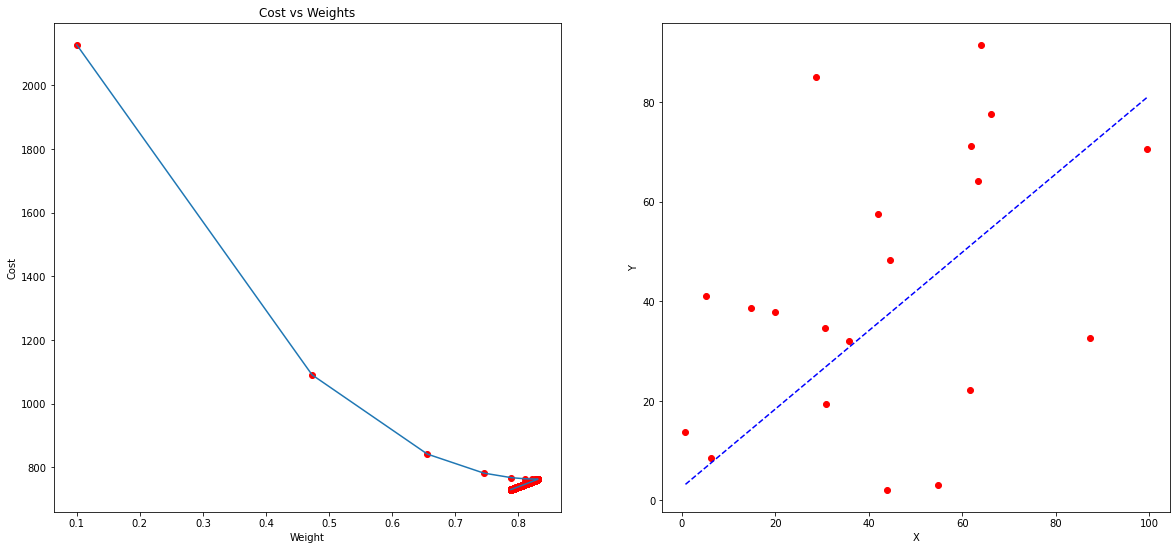

Predicted values: [26.73315655 45.82258409  6.70152961 18.24772011  7.48782472  3.2358328
 14.20297303 80.91818658 71.29431735 30.72388121 37.18013414 26.92823353
 37.72162304 51.1996751  52.58771119 52.99226313 54.71265576 35.68629187
 25.19444756 51.37724109]


In [4]:
# Estimating weight and bias using gradient descent
Y_pred = gradient_descent(X, Y, iterations=2000)    
print(f'Predicted values: {Y_pred}')

In [5]:

# gradient descent optimization with adam for a two-dimensional test function
 
# objective function
def objective(x, y):
	return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
	return np.asarray([x * 2.0, y * 2.0])
 
# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
	# generate an initial point
	x = bounds[:, 0] + np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# initialize first and second moments
	m = [0.0 for _ in range(bounds.shape[0])]
	v = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent updates
	for t in range(n_iter):
		# calculate gradient g(t)
		g = derivative(x[0], x[1])
		# build a solution one variable at a time
		for i in range(x.shape[0]):
			# m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
			m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
			# v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
			v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
			# mhat(t) = m(t) / (1 - beta1(t))
			mhat = m[i] / (1.0 - beta1**(t+1))
			# vhat(t) = v(t) / (1 - beta2(t))
			vhat = v[i] / (1.0 - beta2**(t+1))
			# x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
			x[i] = x[i] - alpha * mhat / (math.sqrt(vhat) + eps)
		# evaluate candidate point
		score = objective(x[0], x[1])
		# report progress
		print('>%d f(%s) = %.5f' % (t, x, score))
	return [x, score]
 
# seed the pseudo random number generator
np.random.seed(1)
# define range for input
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
best, score = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
# print(objective)
# print(derivative)
# print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12613855  0.40070573]) = 0.17648
>2 f([-0.10665938  0.3808601 ]) = 0.15643
>3 f([-0.08770234  0.3611548 ]) = 0.13812
>4 f([-0.06947941  0.34163405]) = 0.12154
>5 f([-0.05222756  0.32234308]) = 0.10663
>6 f([-0.03620086  0.30332769]) = 0.09332
>7 f([-0.02165679  0.28463383]) = 0.08149
>8 f([-0.00883663  0.26630707]) = 0.07100
>9 f([0.00205801 0.24839209]) = 0.06170
>10 f([0.01088844 0.23093228]) = 0.05345
>11 f([0.01759677 0.2139692 ]) = 0.04609
>12 f([0.02221425 0.19754214]) = 0.03952
>13 f([0.02485859 0.18168769]) = 0.03363
>14 f([0.02572196 0.16643933]) = 0.02836
>15 f([0.02505339 0.15182705]) = 0.02368
>16 f([0.02313917 0.13787701]) = 0.01955
>17 f([0.02028406 0.12461125]) = 0.01594
>18 f([0.01679451 0.11204744]) = 0.01284
>19 f([0.01296436 0.10019867]) = 0.01021
>20 f([0.00906264 0.08907337]) = 0.00802
>21 f([0.00532366 0.07867522]) = 0.00622
>22 f([0.00193919 0.06900318]) = 0.00477
>23 f([-0.00094677  0.06005154]) = 0.00361
>24 f(